<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.0.0


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

- HEALTHCARE: For generating models that help in diagnosis. These models are trained for detecting anormalities in medical images and categorize the patients according the deviation from the normality.

- AUTONOMOUS MOVILES: The models in these applications are used to detect other cars in the highway and to detect the lines os that the car doesn't go outside them.

- E-COMMERCE: To categorize cloth pieces and put labels on them for when the user do the searches

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In ML we say that a model is overfitting when in the training step the model performs with a high accuracy, almost perfect, whereas in the test step, the performance and accuracy is the opposite, much lower. This means that the model is really fitting the data used in the training step but is not generalizing so it cannot make predictions. In these cases, the model is too complex so it fits perfectly on the training data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- MORE DATA FOR TRIANING: Use more data for the training so you have more variability in the data and help the model learn more diverse patterns, reduccing the posibility of overfitting.
- FEATURE SELECTION: Reduce the features to use just those that are more relevant to characterize the data
- HYPERPARAMETER TUNNING: Choosing different hyperparameters of the model can help reducing the over fitting. Using more or less hidden layers or neurons can make the difference.
- ENSEMBLE METHODS: Using bagging and boosting methods to help decrease the overfitting can help.
    - Bagging: Multiple models are trained independently on different subsets of the training data. The final prediction is obtained by averaging.
    - Boosting: multiple models are trained sequentially. Each model tries to correct the mistakes made by the previous models. The final prediction is obtained by combining the predictions of all individual models using a weighted average.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

In [4]:
torch.manual_seed(42)

In [5]:
# Setup training data
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),  # Images come as PIL, we want Torch tensors
    target_transform=None   # To transform the labels, if wanted
)

# Setup test data
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
    # We don't need to transform the labels because we want to get the labels
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [6]:
# Get the info of the first image
image, label = train_data[0]

In [7]:
# Visualize the shape of the data of the image
image.shape # The output will be (Colour, heigth, width)

torch.Size([1, 28, 28])

In [8]:
# Print all the classes we will work with
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

Text(0.5, 1.0, '5')

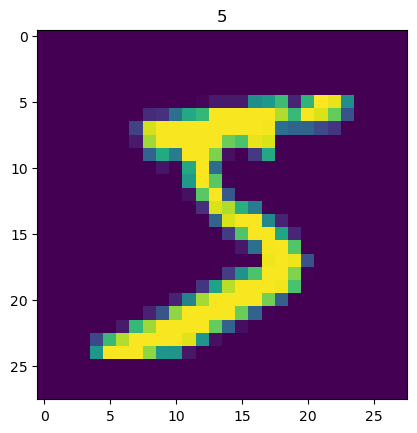

In [9]:
# Visualize the first image
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, '5')

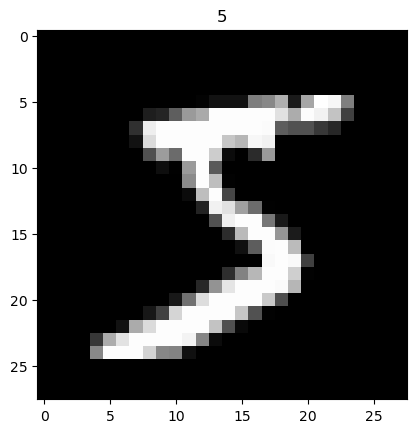

In [10]:
# Visualize image in its original colour, grey (We know it is grey bcs it only has one channel for colour)
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label)

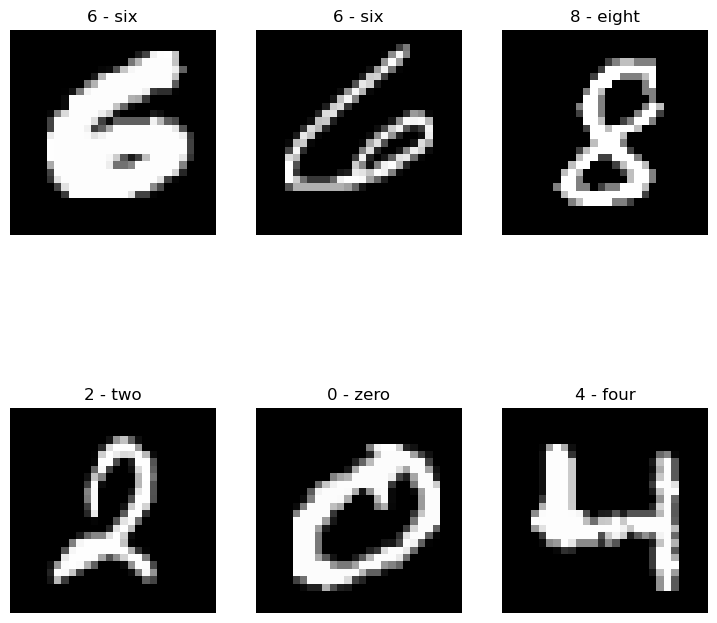

In [12]:
# Visualize 6 random images from the dataset
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 2, 3
for i in range(1, rows * cols + 1):
    index = torch.randint(0, len(train_data), size=[1]).item()  # size specifies the size of the random sample generated 
                                                                # .item() to extract the value of a tensor as scalar
    img, lab = train_data[index]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[lab])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [13]:
from torch.utils.data import DataLoader

# We start setting the Bath size 
BATCH_SIZE = 32

# Trun the data into iterable batches
train_dataloader = DataLoader(train_data, # Data to turn iterable
    batch_size=BATCH_SIZE,
    shuffle=True    # Shuffle the data bcs we want variability
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # No need to shuffle the test bcs we're testing
)

In [15]:
# Check the results
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


1875 * 32 = 6000 size of the whole train dataset
313 * 32 = 1000 size of the whole test dataset
1875 and 313 are how many "groups" (batches) of images we have
32 is the quantity of images we have in each group

In [16]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 0, label size: torch.Size([])


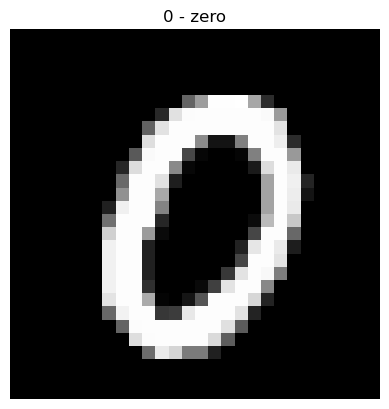

In [17]:
# Check that the data remains unchanged
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [19]:
# Definition of the model
class MINSTModelV0(nn.Module):
    def __init__(self, INPUT_FEATURES: int, OUTPUT_FEATURES: int, HIDDEN_LAYERS: int):
        super().__init__()
        self.block_1 = nn.Sequential(nn.Conv2d(in_channels=INPUT_FEATURES,
                                               out_channels=HIDDEN_LAYERS,
                                               kernel_size=3,
                                               stride=1,
                                               padding=1),
                                     nn.ReLU(),
                                     nn.Conv2d(in_channels=HIDDEN_LAYERS,
                                               out_channels=HIDDEN_LAYERS,
                                               kernel_size=3,
                                               stride=1,
                                               padding=1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2,
                                                 stride=2)
                                    )
        self.block_2 = nn.Sequential(nn.Conv2d(in_channels=HIDDEN_LAYERS,
                                               out_channels=HIDDEN_LAYERS,
                                               kernel_size=3,
                                               padding=1),
                                    nn.ReLU(),
                                    nn.Conv2d(in_channels=HIDDEN_LAYERS,
                                              out_channels=HIDDEN_LAYERS,
                                              kernel_size=3,
                                              padding=1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2)
                                    )
        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=HIDDEN_LAYERS * 7 * 7,
                                                  out_features=OUTPUT_FEATURES)
                                        )
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

In [20]:
# Definition of the features
Input_features = 1 #784 # Quantity of pixels, (28 x 28) Size of the image
Output_features = len(class_names)
Hidden_layers = 10

torch.manual_seed(42)
model_0 = MINSTModelV0(INPUT_FEATURES=Input_features,
                       OUTPUT_FEATURES=Output_features,
                       HIDDEN_LAYERS=Hidden_layers).to(device)
model_0

MINSTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [21]:
# Definition of a function to time the training
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [22]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [23]:
# Define the loss function
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [24]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# Set seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number if epochs
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### TRAINING
    train_loss = 0
    # Add loop to loop over the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print how many samples have been seen
        if batch % 400 == 0:
            print(f"Lookedd at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Set up variables for accumulative add up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumulative)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)
    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Lookedd at 0/60000 samples
Lookedd at 12800/60000 samples
Lookedd at 25600/60000 samples
Lookedd at 38400/60000 samples
Lookedd at 51200/60000 samples

Train loss: 0.33280 | Test loss: 0.07269, Test acc: 97.70%

Epoch: 1
-------
Lookedd at 0/60000 samples
Lookedd at 12800/60000 samples
Lookedd at 25600/60000 samples
Lookedd at 38400/60000 samples
Lookedd at 51200/60000 samples

Train loss: 0.08218 | Test loss: 0.06748, Test acc: 97.90%

Epoch: 2
-------
Lookedd at 0/60000 samples
Lookedd at 12800/60000 samples
Lookedd at 25600/60000 samples
Lookedd at 38400/60000 samples
Lookedd at 51200/60000 samples

Train loss: 0.06431 | Test loss: 0.05667, Test acc: 98.06%

Train time on cpu: 114.758 seconds


** I don't have access to a GPU on my computer right now so it is not possible to compute the comparison with the CPU

### 9.b Extra exercise. Create a function that evaluates models and test in on the one you created

In [27]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
            
        # Scale loss and accuracy to findd the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'MINSTModelV0',
 'model_loss': 0.05667412281036377,
 'model_acc': 98.06309904153355}

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [28]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [43]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=6):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (2 - two)


In [44]:
# Make predictions on test samples with model 0
pred_probs= make_predictions(model=model_0, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.7158e-10, 1.5084e-06, 9.9999e-01, 8.0934e-07, 2.1518e-13, 2.0446e-14,
         2.0560e-13, 2.4267e-08, 9.0217e-06, 7.2918e-10],
        [1.9948e-07, 9.9259e-01, 3.8478e-06, 1.6210e-07, 2.1447e-05, 4.0018e-03,
         2.1225e-03, 1.1577e-06, 1.1864e-03, 6.8399e-05]])

In [45]:
# Make predictions on test samples with model 0
pred_probs= make_predictions(model=model_0, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.7158e-10, 1.5084e-06, 9.9999e-01, 8.0934e-07, 2.1518e-13, 2.0446e-14,
         2.0560e-13, 2.4267e-08, 9.0217e-06, 7.2918e-10],
        [1.9948e-07, 9.9259e-01, 3.8478e-06, 1.6210e-07, 2.1447e-05, 4.0018e-03,
         2.1225e-03, 1.1577e-06, 1.1864e-03, 6.8399e-05]])

In [46]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6])

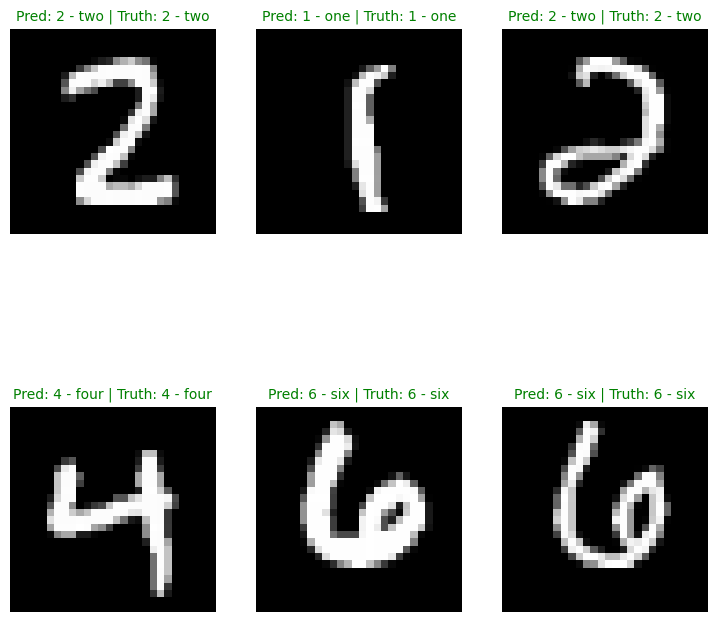

In [47]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 2
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [37]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_0(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [38]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


In [39]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.22.0


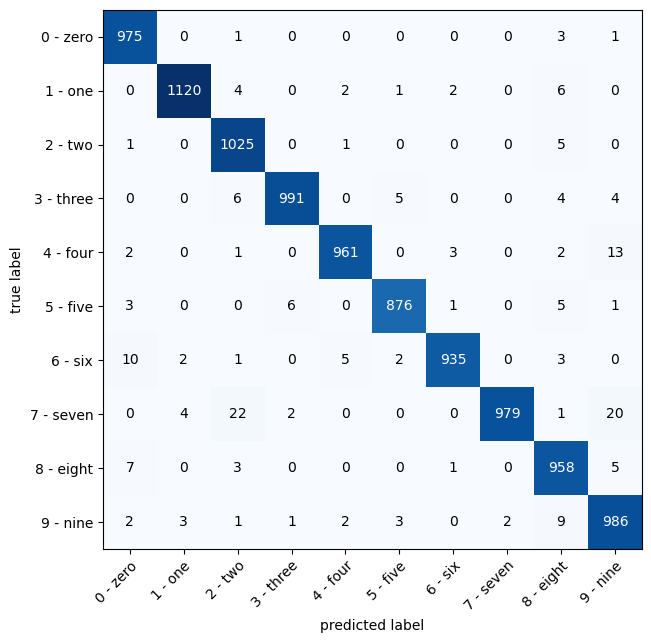

In [40]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?